In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/hakangurler/Desktop/Final_Task'

In [4]:
df = pd.read_csv(os.path.join(path, 'cwurData.csv'))

In [5]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [6]:
df.shape

(2200, 14)

In [7]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [10]:
df.drop(['institution','country', 'broad_impact'], axis=1, inplace=True)

In [11]:
df.columns

Index(['world_rank', 'national_rank', 'quality_of_education',
       'alumni_employment', 'quality_of_faculty', 'publications', 'influence',
       'citations', 'patents', 'score', 'year'],
      dtype='object')

In [12]:
df.shape

(2200, 11)

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1052112205.7787642,
 -414798594.93008363,
 -297896738.48419464,
 -254426056.34502703,
 -227833756.02298972,
 -210347235.02544448,
 -194502848.69626158,
 -183358536.93384662,
 -173531510.7192448]

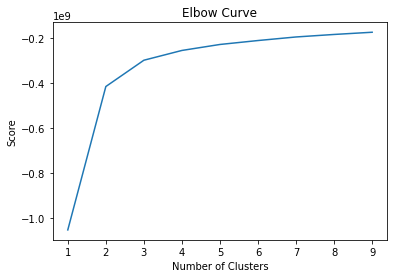

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. 
# This means that the optimal count for my clusters is three.

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 


In [17]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/hakangurler/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [18]:
df['clusters'] = kmeans.fit_predict(df)

/Users/hakangurler/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [19]:
df.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,clusters
0,1,1,7,9,1,1,1,1,5,100.00,2012,1
1,2,2,9,17,3,12,4,4,1,91.67,2012,1
2,3,3,17,11,5,4,2,2,15,89.50,2012,1
3,4,1,10,24,4,16,16,11,50,86.17,2012,1
4,5,4,2,29,7,37,22,22,18,85.21,2012,1


In [20]:
df['clusters'].value_counts()

2    808
1    701
0    691
Name: clusters, dtype: int64

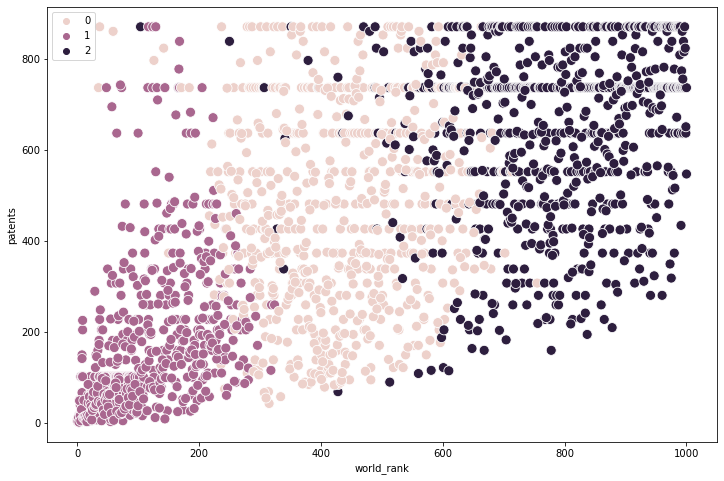

In [21]:
# Plot the clusters for the "world_rank" and "patents" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['world_rank'], y=df['patents'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('world_rank') # Label x-axis.
plt.ylabel('patents') # Label y-axis.
plt.show()

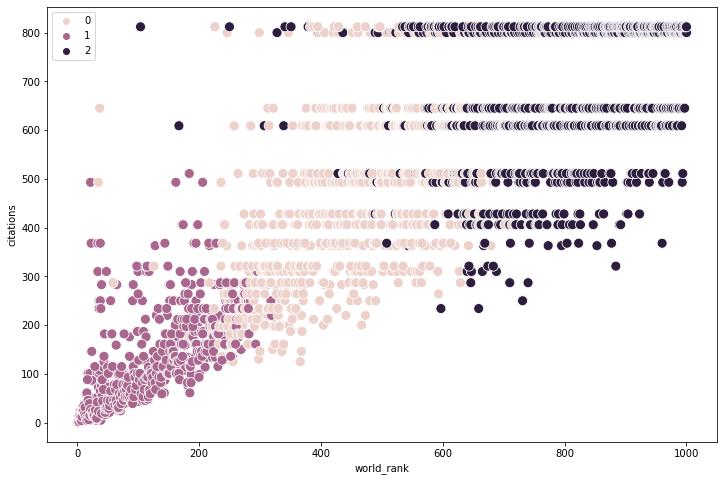

In [22]:
# Plot the clusters for the "world_rank" and "Citations" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['world_rank'], y=df['citations'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('world_rank') 
plt.ylabel('citations') 
plt.show()

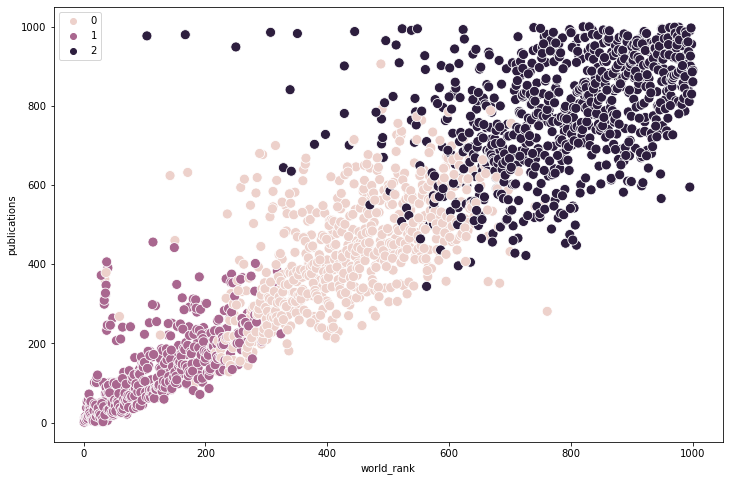

In [23]:
# Plot the clusters for the "world_rank" and "publications" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['world_rank'], y=df['publications'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('world_rank') 
plt.ylabel('publications') 
plt.show()

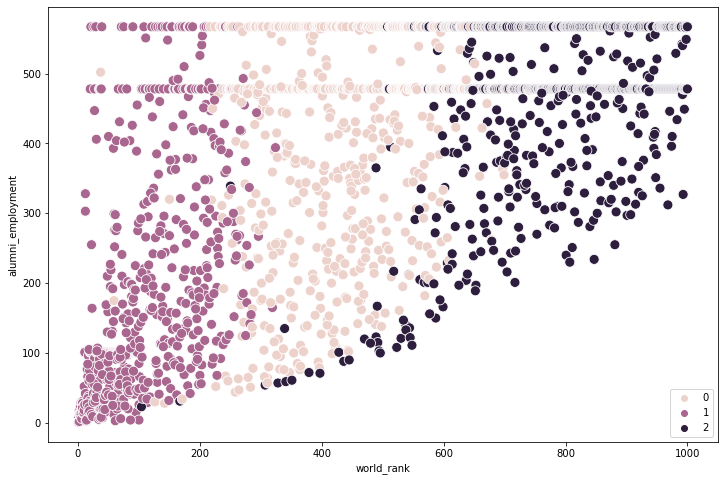

In [24]:
# Plot the clusters for the "world_rank" and "alumni_employment" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['world_rank'], y=df['alumni_employment'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('world_rank') 
plt.ylabel('alumni_employment') 
plt.show()

In [25]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [26]:
df.groupby('cluster').agg({'patents':['mean', 'median'], 
                         'publications':['mean', 'median'], 
                         'alumni_employment':['mean', 'median'],
                          'world_rank':['mean', 'median']})

patents        publications        alumni_employment         \
                   mean median         mean median              mean median   
cluster                                                                       
dark purple  635.866337  697.5   783.358911    798        464.800743    478   
pink         472.820550  481.0   431.890014    424        406.875543    478   
purple       161.002853  101.0   114.706134     97        183.947218    101   

             world_rank         
                   mean median  
cluster                         
dark purple  787.155941  798.5  
pink         433.481910  430.0  
purple       107.763195   89.0

# Alumni employment has also impact on World rank of universities

# Publications has pivotal importance in World rank, however, our results shows that, not only the amount
# of publications is important, also the quality of them has very huge impact on world rank

# Bests universities gets most citations. 

# Most of the patents comes from best universities.